In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Фамилия, имя    77 non-null     object 
 1   Школа           77 non-null     object 
 2   Класс           77 non-null     int64  
 3   A               75 non-null     float64
 4   B               76 non-null     float64
 5   C               41 non-null     float64
 6   D               36 non-null     float64
 7   Итого   I тур   77 non-null     int64  
 8   E               73 non-null     float64
 9   F               61 non-null     float64
 10  G               64 non-null     float64
 11  H               55 non-null     float64
 12  Итого   II тур  77 non-null     int64  
 13  Общий итог      77 non-null     int64  
 14  Место           77 non-null     int64  
 15  Unnamed: 15     27 non-null     object 
dtypes: float64(8), int64(5), object(3)
memory usage: 9.8+ KB
<class 'pandas.core.frame

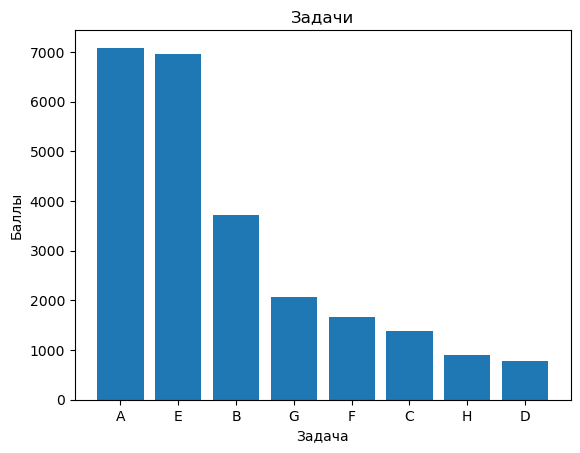

   Фамилия, имя      Школа  Класс      A      B      C      D  Итого   I тур  \
0      Ученик 1  Школа 146     10  100.0  100.0  100.0  100.0            400   
1      Ученик 2    Школа 9     11  100.0  100.0  100.0   33.0            333   
2      Ученик 3    Школа 9     11  100.0  100.0   66.0   63.0            329   
3      Ученик 4  Школа 146     11  100.0  100.0  100.0   63.0            363   
4      Ученик 5    Школа 9     11  100.0  100.0   66.0   63.0            329   
5      Ученик 6  Школа 146     10  100.0  100.0  100.0   33.0            333   
6      Ученик 7    Школа 9     10  100.0  100.0   66.0    0.0            266   
7      Ученик 8    Школа 9      9  100.0   73.0   66.0   33.0            272   
8      Ученик 9    Школа 9     10  100.0  100.0   41.0   33.0            274   
9     Ученик 10    Школа 9      8  100.0  100.0   41.0   33.0            274   
10    Ученик 11      Нытва     11  100.0   73.0   41.0    0.0            214   
11    Ученик 12   Гимн. 17     10  100.0

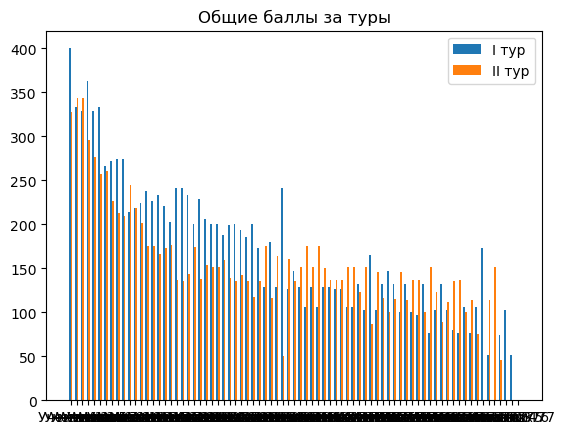

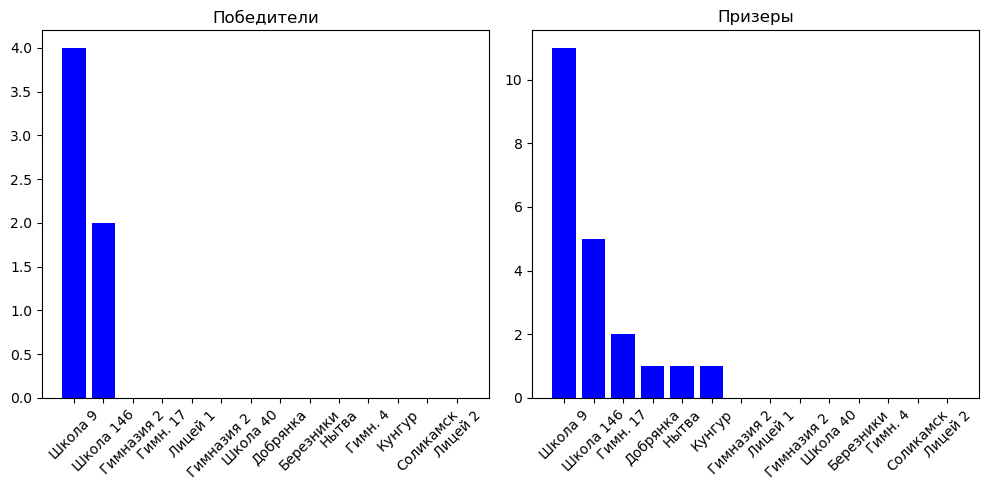

In [14]:
data=pd.read_csv('Результаты олимпиады.csv', encoding='cp1251', sep=';')
data.info()
data.fillna(0, inplace=True)
data.info()
X=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Y=[]
for x in X:
    Y+=[sum(data[x])]
S=pd.Series(Y, index=X)
S=S.sort_values(ascending=False)
plt.bar(S.index, S.values)
plt.title('Задачи')
plt.xlabel('Задача')
plt.ylabel('Баллы')
plt.show()
data_f=data[(data['Unnamed: 15']=='Победитель') | (data['Unnamed: 15']=='Призер')]
print(data_f, '\n')
data_s=data.sort_values('Общий итог', ascending=False)
print(data_s)

fig, ax = plt.subplots()
cat_par=data_s['Фамилия, имя']
x = np.arange(len(cat_par))
width=0.3
rects1 = ax.bar(x - width/2, data_s['Итого   I тур'], width, label='I тур')
rects2 = ax.bar(x + width/2, data_s['Итого   II тур'], width, label='II тур')
ax.set_title('Общие баллы за туры')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()
plt.show()

m=set(data['Школа'])
Y0=dict()
Y1=dict()
for i in m:
    Y0[i]=len(data['Школа'][(data['Unnamed: 15']=='Победитель') & (data['Школа']==i)])
    Y1[i]=len(data['Школа'][(data['Unnamed: 15']=='Призер') & (data['Школа']==i)])
Y0=pd.Series(Y0)
Y1=pd.Series(Y1)
Y0=Y0.sort_values(ascending=False)
Y1=Y1.sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(Y0.index, Y0.values, color='blue')
axs[0].set_title('Победители')
axs[0].set_xticks(range(len(Y0.index)))
axs[0].set_xticklabels(Y0.index, rotation=45)
axs[1].bar(Y1.index, Y1.values, color='blue')
axs[1].set_title('Призеры')
axs[1].set_xticks(range(len(Y1.index))) 
axs[1].set_xticklabels(Y1.index, rotation=45)
plt.tight_layout()
plt.show()